In [33]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
import joblib 
model = joblib.load( 'saved_model.pkl') 

import json

with open("class_dictionary.json","r") as f:
    celeb_dic =   json.loads(f.read() )
    
celeb_dic

{'1': 'Cristiano_Ronaldo', '2': 'ms_dhoni', '3': 'virat_kohli'}

In [36]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [55]:
def get_cropped_img(img ):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    
    for (fx,fy,fw,fh) in faces:
        crop_color_face = img[fy:fy+fh, fx:fx+fw]
        
        return crop_color_face 
    return None


In [38]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    
    
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H=list(coeffs)  
    
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    # plt.imshow(imArray_H    , cmap='gray')

    return imArray_H

In [41]:
def get_combined_img(img):

    img_har = w2d(img,'db1',5)

    scalled_raw_img = cv2.resize(img, (32, 32))
    scalled_har_img = cv2.resize(img_har, (32, 32))

    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1)  ,   scalled_har_img.reshape(32*32,1)))
    
    return combined_img 



def get_tested_img(img):
    cropped_img = get_cropped_img(img)
    
    if cropped_img is None:
        return
    
    return  get_combined_img(img)


In [79]:


def predict_img(img):    
    
    x_test = get_tested_img(img)

    if x_test is not None:
        x_test = x_test.reshape(  1, -1 ).astype(float)
        return  celeb_dic[ str(model.predict(x_test)[0])]
    else:
        print('Face is not visible !!!')
    
img = cv2.imread('./datasets/virat_kohli/Virat_Kohli_AP.jpg')
predict_img(img)

Face is not visible !!!


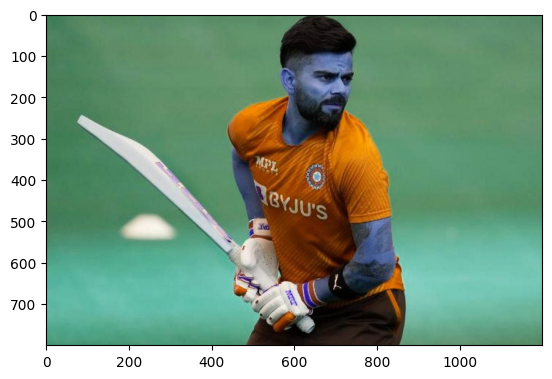

In [80]:
plt.imshow(img)
plt.show()